In [63]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scipy
!pip install plotly
!pip install polars
!pip install streamlit

In [87]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
consumo_cerveja_dataset = "/content/drive/MyDrive/Consumo_cerveja_São Paulo/Consumo_cerveja.csv"

### **Descrever o objetivo do modelo considerando a estrutura do conjunto de dados - o que se pretende solucionar:**
O objetivo do modelo será demonstrar os impactos das variáveis disponíveis no consumo de cerveja em uma determinada região e prever o consumo para determinados cenários. Será interessante entender como fatores como temperatura, precipitação e dia da semana influenciam o consumo de cerveja.

### Descrever o conjunto de dados escolhido:

In [89]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Consumo_cerveja_São Paulo/Consumo_cerveja.csv')
print("Origem: Dados coletados em São Paulo, Brasil.")
print("Nome: Arquivo de dados sobre o consumo de cerveja.")
print(f"Tamanho: {df.memory_usage().sum()} bytes")  # Tamanho do arquivo em bytes
print(f"Quantidade de Registros: {len(df)}")  # Número total de registros
print(f"Linhas x Colunas: {df.shape}")  # Número de linhas e colunas
print("Dados Faltantes:")
print(df.isnull().sum())  # Verifica se há valores faltantes e quantos são

Origem: Dados coletados em São Paulo, Brasil.
Nome: Arquivo de dados sobre o consumo de cerveja.
Tamanho: 52824 bytes
Quantidade de Registros: 941
Linhas x Colunas: (941, 7)
Dados Faltantes:
Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64


### Descrever o pré-processamento realizado no conjunto de dados (Feature engineering):

In [90]:
import pandas as pd

# Carregar os dados
dados_cerveja = pd.read_csv('/content/drive/MyDrive/Consumo_cerveja_São Paulo/Consumo_cerveja.csv')

# Verificar dados faltantes
print("Dados Faltantes:")
print(dados_cerveja.isnull().sum())

# Preencher dados faltantes apenas em colunas numéricas com a média das colunas
dados_cerveja.fillna(dados_cerveja.select_dtypes(include=['float64', 'int64']).mean(), inplace=True)


Dados Faltantes:
Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64


Padronização ou normalização não é necessaria pois não possuimos variáveis com escalas muito grandes entre as colunas

### Análise da Correlação das Variáveis


        Data  Temperatura Media (C)  Temperatura Minima (C)  \
0 2015-01-01                  27.30                    23.9   
1 2015-01-02                  27.02                    24.5   
2 2015-01-03                  24.82                    22.4   
3 2015-01-04                  23.98                    21.5   
4 2015-01-05                  23.82                    21.0   

   Temperatura Maxima (C)  Precipitacao (mm)  Final de Semana  \
0                    32.5                0.0              0.0   
1                    33.5                0.0              0.0   
2                    29.9                0.0              1.0   
3                    28.6                1.2              1.0   
4                    28.3                0.0              0.0   

   Consumo de cerveja (litros)  
0                       25.461  
1                       28.972  
2                       30.814  
3                       29.799  
4                       28.900  
Data                           5

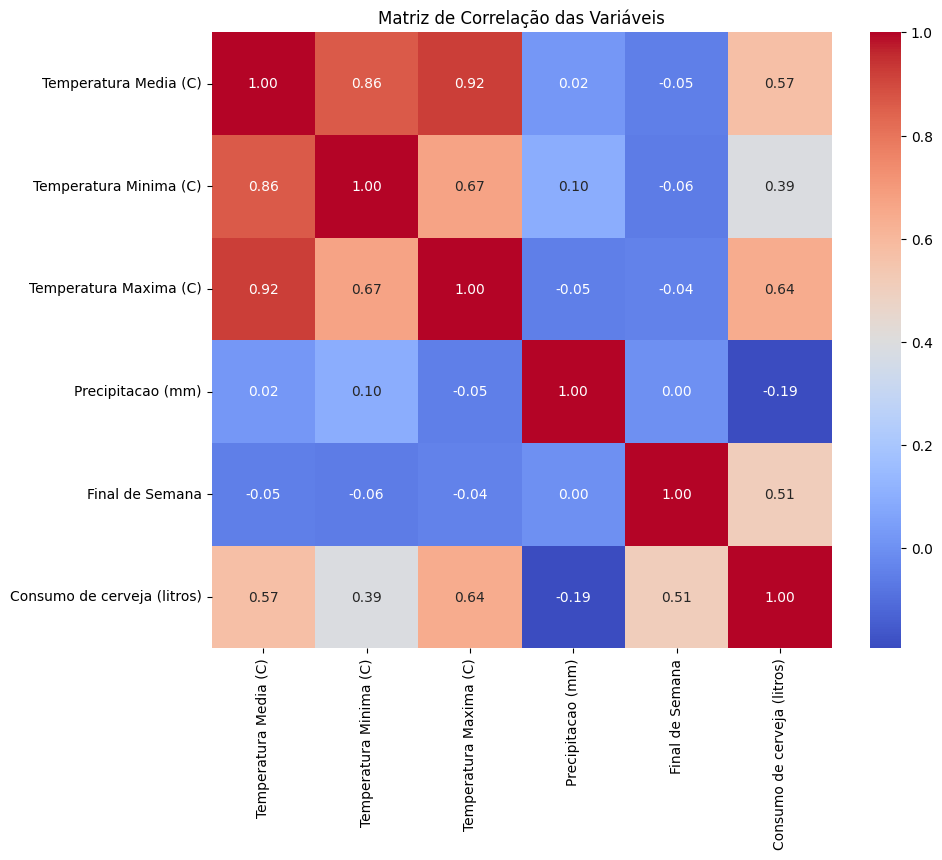

Consumo de cerveja (litros)    1.000000
Temperatura Maxima (C)         0.642672
Temperatura Media (C)          0.574615
Final de Semana                0.505981
Temperatura Minima (C)         0.392509
Precipitacao (mm)             -0.193784
Name: Consumo de cerveja (litros), dtype: float64


In [91]:
import pandas as pd

# Carregar os dados
dados_cerveja = pd.read_csv('/content/drive/MyDrive/Consumo_cerveja_São Paulo/Consumo_cerveja.csv')

# Convertendo a coluna "Data" para o tipo de data
dados_cerveja['Data'] = pd.to_datetime(dados_cerveja['Data'])

# Substituir vírgulas por pontos e converter para tipo numérico
dados_cerveja['Temperatura Media (C)'] = dados_cerveja['Temperatura Media (C)'].str.replace(',', '.').astype(float)
dados_cerveja['Temperatura Minima (C)'] = dados_cerveja['Temperatura Minima (C)'].str.replace(',', '.').astype(float)
dados_cerveja['Temperatura Maxima (C)'] = dados_cerveja['Temperatura Maxima (C)'].str.replace(',', '.').astype(float)
dados_cerveja['Precipitacao (mm)'] = dados_cerveja['Precipitacao (mm)'].str.replace(',', '.').astype(float)

# Visualizar as primeiras linhas do dataframe
print(dados_cerveja.head())

# Verificar dados faltantes
print(dados_cerveja.isnull().sum())

# Excluir a coluna "Data"
dados_cerveja.drop(columns=['Data'], inplace=True)

# Calculando a matriz de correlação
correlation_matrix = dados_cerveja.corr()

import seaborn as sns
import matplotlib.pyplot as plt

# Plotando o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis')
plt.show()

# Correlações com a variável alvo (consumo de cerveja)
correlation_with_target = correlation_matrix['Consumo de cerveja (litros)'].sort_values(ascending=False)
print(correlation_with_target)


In [92]:
# Correlações com a variável alvo (consumo de cerveja)
correlation_with_target = correlation_matrix['Consumo de cerveja (litros)'].sort_values(ascending=False)
print(correlation_with_target)

Consumo de cerveja (litros)    1.000000
Temperatura Maxima (C)         0.642672
Temperatura Media (C)          0.574615
Final de Semana                0.505981
Temperatura Minima (C)         0.392509
Precipitacao (mm)             -0.193784
Name: Consumo de cerveja (litros), dtype: float64


In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Excluir colunas não numéricas
dados_numericos = dados_cerveja.select_dtypes(include=['float64', 'int64'])

# Normalizar os dados numéricos
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(dados_numericos)

# Definir a variável alvo
target = dados_cerveja['Consumo de cerveja (litros)']

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(dados_normalizados, target, test_size=0.2, random_state=42)

In [98]:
from sklearn.impute import SimpleImputer

# Lista para armazenar os modelos SimpleImputer
imputers = []

# Preencher os valores ausentes no conjunto de treinamento
X_train_imputed = X_train_cleaned.copy()
for feature in X_train_imputed.columns:
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed[feature] = imputer.fit_transform(X_train_imputed[[feature]])
    imputers.append(imputer)

# Inicializar e treinar o modelo RandomForestRegressor
modelo_rf = RandomForestRegressor()
modelo_rf.fit(X_train_imputed, y_train_imputed_cleaned)


RandomForestRegressor()

Essas métricas fornecem uma medida de quão bem o modelo está fazendo previsões em termos da diferença entre os valores previstos e os valores reais da variável alvo:

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Remover as linhas com valores NaN do conjunto de treinamento e do vetor de destino
not_nan_indices_train = ~y_train.isna()
X_train_cleaned = X_train[not_nan_indices_train]
y_train_cleaned = y_train[not_nan_indices_train]

# Remover as linhas com valores NaN do conjunto de teste e do vetor de destino
not_nan_indices_test = ~y_test.isna()
X_test_cleaned = X_test[not_nan_indices_test]
y_test_cleaned = y_test[not_nan_indices_test]

# Preencher os valores ausentes no conjunto de treinamento
X_train_imputed = imputer.fit_transform(X_train_cleaned)

# Preencher os valores ausentes no conjunto de teste
X_test_imputed = imputer.transform(X_test_cleaned)

# Inicializar e treinar o modelo RandomForestRegressor
modelo_rf = RandomForestRegressor()
modelo_rf.fit(X_train_imputed, y_train_cleaned)

# Fazer previsões com o conjunto de teste
y_pred = modelo_rf.predict(X_test_imputed)

# Calcular o erro quadrático médio (MSE)
mse = mean_squared_error(y_test_cleaned, y_pred)
print("Erro Quadrático Médio (MSE):", mse)

# Calcular o erro absoluto médio (MAE)
mae = mean_absolute_error(y_test_cleaned, y_pred)
print("Erro Absoluto Médio (MAE):", mae)


Erro Quadrático Médio (MSE): 0.00842617756617681
Erro Absoluto Médio (MAE): 0.05168308823529438


Esses resultados sugerem que seu modelo de regressão RandomForestRegressor está se saindo muito bem na tarefa de prever o consumo de cerveja em litros com base nos dados fornecidos.

In [86]:
import streamlit as st
import joblib

# Carregar o modelo treinado
modelo = joblib.load('modelo_rf.pkl')

# Interface Streamlit
st.title('Aplicativo de Classificação de Consumo de Cerveja')

DeltaGenerator()